In [15]:
import re
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [16]:
data=pd.read_csv('IMDB Dataset.csv')

In [17]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

def preprocess_text_ng(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

data['tokenized_review'] = data['review'].apply(preprocess_text)

data['concated_review'] = data['review'].apply(preprocess_text_ng)

data['label'] = data['sentiment'].map({'positive': 1, 'negative': 0})

In [18]:
def generate_embedding_vector(word_vector, word2vec_model):
    word_embeddings = []
    for word in word_vector:
        if word in word2vec_model.wv:
            word_embedding = word2vec_model.wv[word]
            word_embeddings.append(word_embedding)

    embedding_vector = np.sum(word_embeddings, axis=0)
    return embedding_vector


In [19]:
tokenized_corpus=data['tokenized_review'].to_list()

In [20]:
word2vec_model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4)

In [21]:
data['embedding_vector'] = data['tokenized_review'].apply(lambda x: generate_embedding_vector(x, word2vec_model))

In [22]:
X = np.array(data['embedding_vector'].tolist())

In [23]:
ngram_vectorizer = CountVectorizer(ngram_range=(1, 2))
X_ngram = ngram_vectorizer.fit_transform(data['concated_review'])

In [24]:
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(data['concated_review'])

In [25]:
tsne = TSNE(n_components=2, random_state=42, init='random')

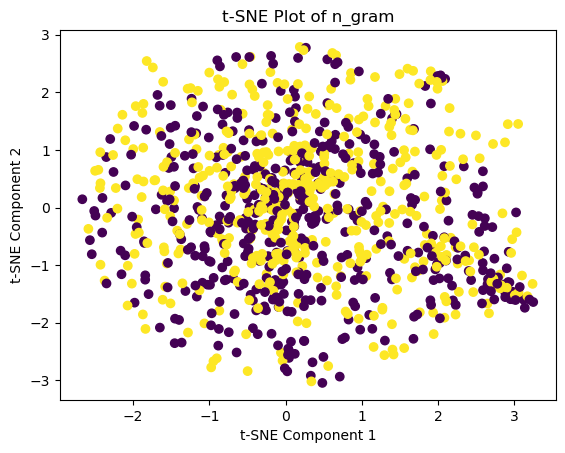

In [26]:
tsne_result_ngram = tsne.fit_transform(X_ngram[:1000])
# Plot t-SNE results
plt.scatter(tsne_result_ngram[:, 0], tsne_result_ngram[:, 1],c=data['label'].head(1000))
plt.title('t-SNE Plot of n_gram')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

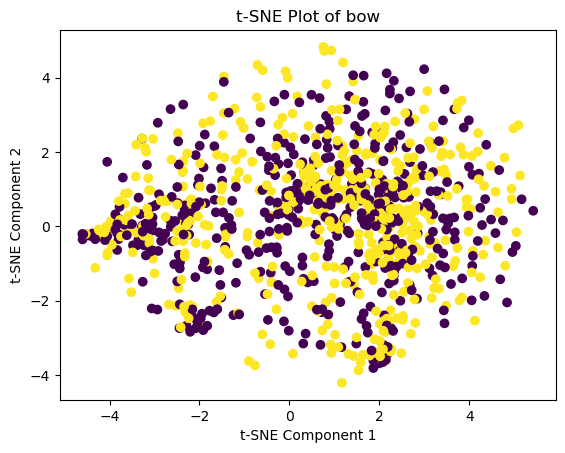

In [27]:
tsne_result_bow = tsne.fit_transform(X_bow[:1000])
# Plot t-SNE results
plt.scatter(tsne_result_bow[:, 0], tsne_result_bow[:, 1],c=data['label'].head(1000))
plt.title('t-SNE Plot of bow')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

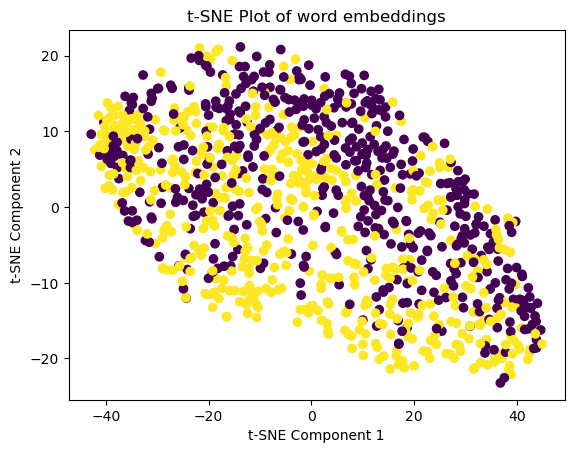

In [28]:
tsne_result_we = tsne.fit_transform(X[:1000])
# Plot t-SNE results
plt.scatter(tsne_result_we[:, 0], tsne_result_we[:, 1],c=data['label'].head(1000))
plt.title('t-SNE Plot of word embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()